In [18]:
import numpy as np # mathemtaical computation
# numpy is aliased as np
import pandas as pd # data preprocessing
# pandas is aliased as pd
import matplotlib.pyplot as plt # visualization
# pyplot is aliased as plt
import seaborn as sns  # visualization
# seaborn is aliased as sns

In [19]:
#importent library's 
# Major Import
import sklearn
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [20]:
df=pd.read_csv('laptop_price_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,Cpu brand,HDD,SSD,Gpu brand,os
0,0,Apple,Ultrabook,8,1.37,71378.6832,0,1,Intel Core i5,0,128,Intel,Mac
1,1,Apple,Ultrabook,8,1.34,47895.5232,0,0,Intel Core i5,0,0,Intel,Mac
2,2,HP,Notebook,8,1.86,30636.0000,0,0,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,3,Apple,Ultrabook,16,1.83,135195.3360,0,1,Intel Core i7,0,512,AMD,Mac
4,4,Apple,Ultrabook,8,1.37,96095.8080,0,1,Intel Core i5,0,256,Intel,Mac


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1302 non-null   int64  
 1   Company      1302 non-null   object 
 2   TypeName     1302 non-null   object 
 3   Ram          1302 non-null   int64  
 4   Weight       1302 non-null   float64
 5   Price        1302 non-null   float64
 6   Touchscreen  1302 non-null   int64  
 7   Ips          1302 non-null   int64  
 8   Cpu brand    1302 non-null   object 
 9   HDD          1302 non-null   int64  
 10  SSD          1302 non-null   int64  
 11  Gpu brand    1302 non-null   object 
 12  os           1302 non-null   object 
dtypes: float64(2), int64(6), object(5)
memory usage: 132.4+ KB


In [8]:
df.shape

(1302, 13)

In [9]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Ram', 'Weight', 'Price',
       'Touchscreen', 'Ips', 'Cpu brand', 'HDD', 'SSD', 'Gpu brand', 'os'],
      dtype='object')

In [25]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

Unnamed: 0     0
Company        0
TypeName       0
Ram            0
Weight         0
Price          0
Touchscreen    0
Ips            0
Cpu brand      0
HDD            0
SSD            0
Gpu brand      0
os             0
dtype: int64

In [22]:
df.dtypes

Unnamed: 0       int64
Company         object
TypeName        object
Ram              int64
Weight         float64
Price          float64
Touchscreen      int64
Ips              int64
Cpu brand       object
HDD              int64
SSD              int64
Gpu brand       object
os              object
dtype: object

In [28]:
df['Unnamed: 0'].nunique()

1302

In [30]:
df.dtypes

Company         object
TypeName        object
Ram              int64
Weight         float64
Price          float64
Touchscreen      int64
Ips              int64
Cpu brand       object
HDD              int64
SSD              int64
Gpu brand       object
os              object
dtype: object

In [29]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'Touchscreen', 'Ips',
       'Cpu brand', 'HDD', 'SSD', 'Gpu brand', 'os'],
      dtype='object')

In [31]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'Touchscreen', 'Ips',
       'Cpu brand', 'HDD', 'SSD', 'Gpu brand', 'os'],
      dtype='object')

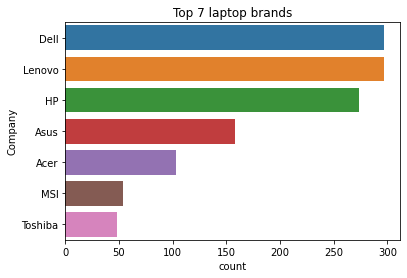

In [32]:
sns.countplot(y=df['Company'],
              order=df['Company'].value_counts().sort_values(ascending=False)[:7].index)
plt.title('Top 7 laptop brands')
plt.show()

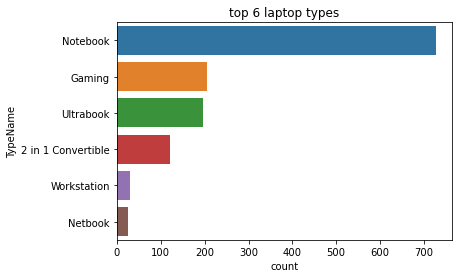

In [40]:
sns.countplot(y=df['TypeName'],
             order=df['TypeName'].value_counts().sort_values(ascending=False)[:6].index)
plt.title('top 6 laptop types')
plt.show()

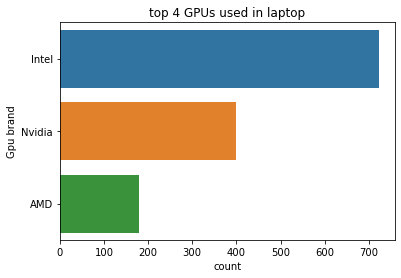

In [49]:
sns.countplot(y=df['Gpu brand'],
              order=df['Gpu brand'].value_counts().sort_values(ascending=False).index)
plt.title('top 4 GPUs used in laptop')
plt.show()

In [50]:
 df.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'Touchscreen', 'Ips',
       'Cpu brand', 'HDD', 'SSD', 'Gpu brand', 'os'],
      dtype='object')

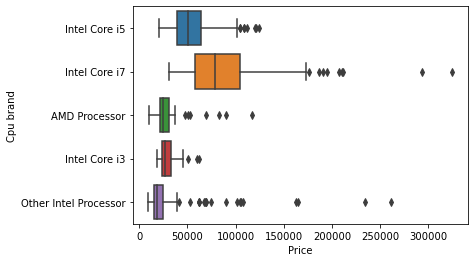

In [51]:
sns.boxplot(y=df['Cpu brand'],x=df['Price'])
plt.show()

# Box for different GPU

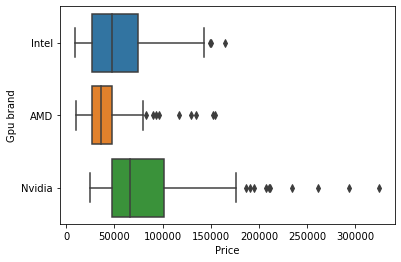

In [52]:
sns.boxplot(y=df['Gpu brand'],x=df['Price'])
plt.show()

#### Boxplot for Company based on Price

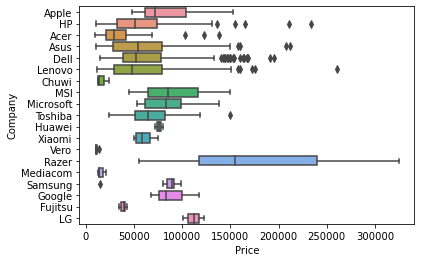

In [56]:
sns.boxplot(y=df['Company'],x=df['Price'])
plt.show()

In [57]:
###Distribution Plot for Price

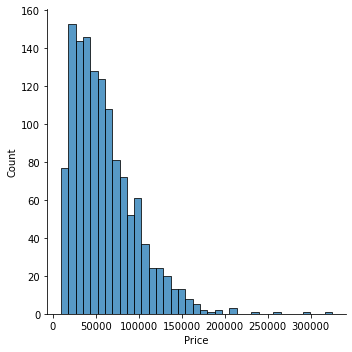

In [58]:
sns.displot(df["Price"])
plt.show()

In [59]:
###correlation

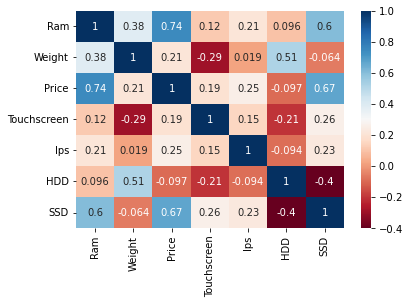

In [64]:
corr =  df.corr()


sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

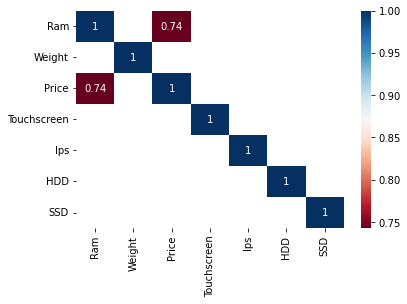

In [67]:
sns.heatmap(corr[abs(corr)>0.7],annot=True,cmap='RdBu')
plt.show()

In [ ]:
###Outliers

In [68]:
df.describe(percentiles=[0.01,0.02,0.03,0.05,0.97,0.98,0.99])

,Ram,Weight,Price,Touchscreen,Ips,HDD,SSD
count,1302.000000,1302.000000,1302.000000,1302.000000,1302.00000,1302.000000,1302.000000
mean,8.385561,2.039416,59889.058673,0.146697,0.27957,414.101382,183.874040
std,5.085166,0.665274,37251.183866,0.353940,0.44896,515.889348,186.969314
min,2.000000,0.690000,9270.720000,0.000000,0.00000,0.000000,0.000000
1%,2.000000,0.970000,12201.120000,0.000000,0.00000,0.000000,0.000000
2%,4.000000,1.080200,13747.305600,0.000000,0.00000,0.000000,0.000000
3%,4.000000,1.100000,14811.323184,0.000000,0.00000,0.000000,0.000000
5%,4.000000,1.170000,16463.520000,0.000000,0.00000,0.000000,0.000000
50%,8.000000,2.040000,52107.840000,0.000000,0.00000,0.000000,256.000000
97%,16.000000,3.780000,144474.580800,1.000000,1.00000,1000.000000,512.000000


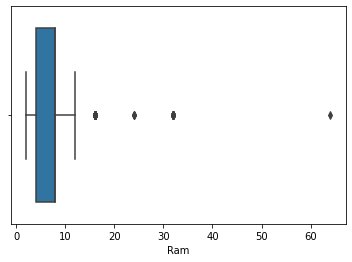

In [69]:
sns.boxplot(x=df['Ram'])
plt.show()

In [70]:
print(df[df['Ram']>20].shape)

(21, 12)


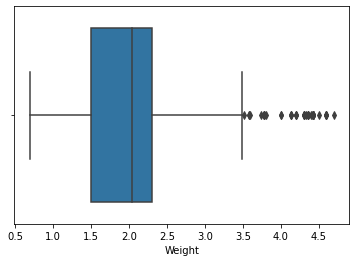

In [73]:
sns.boxplot(x=df['Weight'])
plt.show()

In [77]:
print(df[df['Weight']>3.5].shape)

(46, 12)


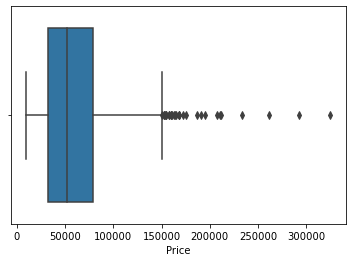

In [78]:
sns.boxplot(x=df['Price'])
plt.show()

In [80]:
print(df[df['Price']>200000].shape)

(7, 12)


In [ ]:
#### Outlier handling

In [84]:
df['Weight']= np.where(df['Weight']>3.5,3.8,df['Weight'])
# df['Weight']= np.where(df['Weight']>3.5,3.5,df['Weight'])

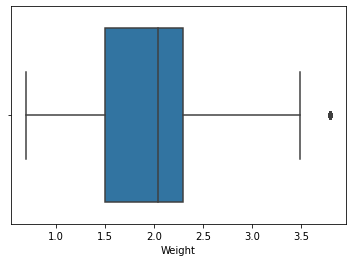

In [85]:
sns.boxplot(x=df['Weight'])
plt.show()

In [ ]:
#### We will handle Encoding catgeorical columns using ColumnTransformer
#### Select x(independent features) and y(dependent feature)

In [86]:
x = df.drop('Price',axis=1)
y = df['Price']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(1302, 11)
(1302,)


In [87]:
print(1302*0.25)

325.5


In [89]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(976, 11)
(326, 11)
(976,)
(326,)


In [ ]:
#### Create function to cpmute MSE, RMSE, MAE,Trai and Test Test Score

In [90]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [91]:
def eval_model(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mse)
    r2s = r2_score(ytest,ypred)
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2 Score',r2s)

In [94]:
x_train.dtypes

Company         object
TypeName        object
Ram              int64
Weight         float64
Touchscreen      int64
Ips              int64
Cpu brand       object
HDD              int64
SSD              int64
Gpu brand       object
os              object
dtype: object

In [93]:
####Import ML model buliding libraries

In [100]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [101]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [95]:
# Columns index that needs to undergo OnehOtEncoding - [0,1,6,9,10]

In [105]:
#### 1) LinearRegression

In [106]:
step1 = ColumnTransformer(transformers=
                        [('ohe',OneHotEncoder(drop='first',sparse=False),[0,1,6,9,10])],
                              remainder='passthrough')
step2 = LinearRegression()

pipe_lr = Pipeline([('step1',step1),('step2',step2)])

pipe_lr.fit(x_train,y_train)

ypred_lr = pipe_lr.predict(x_test)

eval_model(y_test,ypred_lr)

MAE 13796.786657940254
MSE 442997220.94692487
RMSE 21047.49916134753
R2 Score 0.7015992587088653


C:\Users\dell\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [107]:
#### 2) Ridge Regression 

In [104]:
step1 = ColumnTransformer(transformers=
                          [('ohe',OneHotEncoder(drop='first',sparse=False),[0,1,6,9,10])],
                              remainder='passthrough')
step2 = Ridge(alpha=2.41)

pipe_rid = Pipeline([('step1',step1),('step2',step2)])

pipe_rid.fit(x_train,y_train)

ypred_rid = pipe_rid.predict(x_test)

eval_model(y_test,ypred_rid)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


MAE 13551.231029099019
MSE 413134479.50398004
RMSE 20325.709815501647
R2 Score 0.7217146539353014


In [108]:
#### 3) Lasso Regression

In [109]:
step1 = ColumnTransformer(transformers=
                          [('ohe',OneHotEncoder(drop='first',sparse=False),[0,1,6,9,10])],
                              remainder='passthrough')
step2 = Lasso(alpha=0.234)

pipe_las = Pipeline([('step1',step1),('step2',step2)])

pipe_las.fit(x_train,y_train)

ypred_las = pipe_las.predict(x_test)

eval_model(y_test,ypred_las)

MAE 13793.626488734186
MSE 442820465.9505969
RMSE 21043.299787595028
R2 Score 0.7017183200018875


C:\Users\dell\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [110]:
#### 4) RandomForest Model

In [114]:
step1 = ColumnTransformer(transformers=
                         [('ohe',OneHotEncoder(drop='first',sparse=False),[0,1,6,9,10])],
                          remainder='passthrough')
step2 = RandomForestRegressor(n_estimators=100,max_depth=8,min_samples_split=11,random_state=5)

pipe_rf = Pipeline([('step1',step1),('step2',step2)])

pipe_rf.fit(x_train,y_train)

ypred_rf = pipe_rf.predict(x_test)

eval_model(y_test,ypred_rf)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


MAE 11636.105193003952
MSE 344254119.00462
RMSE 18554.086315543
R2 Score 0.7681121247579732


In [116]:
#### 5) Decision Tree Regressor

In [117]:
step1 = ColumnTransformer(transformers=
                          [('ohe',OneHotEncoder(drop='first',sparse=False),[0,1,6,9,10])],
                              remainder='passthrough')
step2 = DecisionTreeRegressor(max_depth=8,min_samples_split=11,random_state=5)

pipe_dt = Pipeline([('step1',step1),('step2',step2)])

pipe_dt.fit(x_train,y_train)

ypred_dt = pipe_dt.predict(x_test)

eval_model(y_test,ypred_dt)

MAE 11924.936422152501
MSE 323653916.88587874
RMSE 17990.384011629067
R2 Score 0.7819883192177034


C:\Users\dell\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [118]:
#### DT is the best performing model based on RMSE

In [119]:
#### Model saving

In [120]:
import pickle

In [121]:
pickle.dump(pipe_dt,open('dt_model.pkl','wb'))
pickle.dump(df,open('data.pkl','wb'))

In [122]:
print(df['HDD'].unique())
print(df['SSD'].unique())
print(df['Ram'].unique())

[   0  500 1000 2000   32  128]
[ 128    0  256  512   32   64 1000 1024   16  768  180  240    8]
[ 8 16  4  2 12  6 32 24 64]


In [123]:
df['Ips'].value_counts()

0    938
1    364
Name: Ips, dtype: int64